# Loan Repayment Assessment in Banking By Shivam Namdeo

# Task is to build and train a model that identifies a customer will repay or default from the loan dataset

Data description of these features are given below 
Column Description:

earliest_cr_line: The month the borrower's earliest reported credit line was opened

emp_title: The job title supplied by the Borrower when applying for the loan.

fico_range_high:The upper boundary range the borrower’s FICO at loan origination belongs to.

fico_range_low:The lower boundary range the borrower’s FICO at loan origination belongs to.

Grade: LC assigned loan grade

application_type:Indicates whether the loan is an individual application or a joint application with two co-borrowers

initial_list_status: The initial listing status of the loan. Possible values are – W, F

num_actv_bc_tl: Number of currently active bankcard accounts.

mort_acc: Number of mortgage accounts.

tot_cur_bal: Total current balance of all accounts

open_acc: The number of open credit lines in the borrower's credit file.

pub_rec: Number of derogatory public records

pub_rec_bankruptcies Number of public record bankruptcies.

Purpose: A category provided by the borrower for the loan request.

revol_bal: Total credit revolving balance

Title: The loan title provided by the borrower

total_acc: The total number of credit lines currently in the borrower's credit file

verification_status: Indicates if income was verified by LC, not verified, or if the income source was verified

addr_state: The state provided by the borrower in the loan application

annual_inc: The self-reported annual income provided by the borrower during registration.

emp_length:Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

home_ownership: The home ownership status provided by the borrower during registration.Our values are: RENT, OWN, MORTGAGE, OTHER.

int_rate: Interest Rate on the loan

loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

sub_grade: LC assigned loan subgrade

Term: The number of payments on the loan. Values are in months and can be either 36 or 60.

revol_util: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

Target
loan_status:Status of the loan

In [1]:
# Importing necessary libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re 
from datetime import datetime
from scipy.stats import skew, kurtosis
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")

Seperate files for train and test data are provided, all the preprocessing, feature engineering tasks etc are carried out on both the datasets in parallels.

In [2]:
# The provided training dataset loaded using pandas library into df_train dataframe
df_train=pd.read_csv(r'C:\Users\HP\Downloads\train_loan_data (1).csv')

In [3]:
# The provided testing dataset loaded using pandas library into df_train dataframe
df_test=pd.read_csv(r'C:\Users\HP\Downloads\test_loan_data (1).csv')

In [4]:
#Using pandas to display maximum columns
pd.set_option('display.max_columns', None) 

In [5]:
# Using head method to display first 5 rows of training dataset
df_train.head()

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,initial_list_status,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,Jul-97,10+ years,Deputy,744,740,E,MORTGAGE,Individual,w,18.99,18075,1.0,1.0,319479.0,7,0,0.0,debt_consolidation,5338,93.6,E1,60 months,Debt consolidation,8,Source Verified,Defaulted
1,CA,40000.0,Apr-87,10+ years,Department of Veterans Affairs,724,720,B,RENT,Individual,w,10.16,8800,4.0,0.0,19944.0,5,0,0.0,debt_consolidation,19944,60.3,B1,36 months,Credit Loan,12,Verified,Paid
2,FL,60000.0,Aug-07,10+ years,Marble polishing,679,675,B,MORTGAGE,Individual,w,11.47,18000,4.0,2.0,23199.0,7,0,0.0,debt_consolidation,23199,88.5,B5,36 months,Debt consolidation,16,Source Verified,Paid
3,IL,100742.0,Sep-80,10+ years,printer,664,660,B,MORTGAGE,Individual,w,9.16,20000,4.0,1.0,72651.0,12,0,0.0,debt_consolidation,18425,69.0,B2,36 months,Debt consolidation,19,Source Verified,Paid
4,MD,80000.0,Jul-99,10+ years,Southern Mgmt,669,665,F,RENT,Individual,f,23.83,35000,14.0,7.0,64631.0,23,0,0.0,debt_consolidation,34370,90.0,F5,60 months,Debt Connsolidation,59,Verified,Paid


In [6]:
# Using head method to display first 5 rows of testing dataset
df_test.head()

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,initial_list_status,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status
0,MO,50000.0,May-2012,1 year,Tower technician,719.0,715.0,C,OWN,Individual,f,13.99,5000.0,1.0,0.0,33395.0,9.0,0.0,0.0,debt_consolidation,2568.0,9.8,C4,36 months,Debt consolidation,11.0,Source Verified
1,HI,92000.0,Dec-2001,10+ years,Supervisor,684.0,680.0,B,RENT,Individual,f,10.99,30000.0,2.0,2.0,229832.0,11.0,0.0,0.0,debt_consolidation,30394.0,75.4,B2,36 months,Debt consolidation,35.0,Source Verified
2,TX,89000.0,Mar-1989,10+ years,APPLICATIONS PROGRAMMER,679.0,675.0,B,MORTGAGE,Individual,w,10.15,16000.0,5.0,2.0,181616.0,15.0,0.0,0.0,credit_card,38400.0,75.3,B2,60 months,Credit card refinancing,41.0,Not Verified
3,CA,33000.0,Nov-2004,9 years,San Diego Unified School District,674.0,670.0,C,RENT,Individual,f,13.68,10000.0,6.0,0.0,30603.0,12.0,1.0,1.0,debt_consolidation,21224.0,69.4,C1,36 months,Breathing Room,16.0,Not Verified
4,MI,35580.0,Feb-1997,NaN,NaN,704.0,700.0,B,MORTGAGE,Individual,f,14.09,4000.0,2.0,4.0,124597.0,8.0,0.0,0.0,debt_consolidation,3471.0,39.4,B5,36 months,debitconsolidation,19.0,Verified


# Statistics descriptive analysis

In [7]:
# A look at statistical analysis of the values in the numerical features
df_train.describe()

,annual_inc,fico_range_high,fico_range_low,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,total_acc
count,8.000000e+04,80000.000000,80000.000000,80000.000000,80000.000000,76052.000000,77229.000000,7.605200e+04,80000.000000,80000.000000,79969.000000,8.000000e+04,79947.000000,80000.000000
mean,7.604614e+04,699.987975,695.987813,13.232898,14403.867813,3.633790,1.674759,1.415864e+05,11.605675,0.216675,0.137103,1.628934e+04,51.899142,25.036875
std,6.902006e+04,31.734840,31.734075,4.771705,8703.826298,2.262505,2.005104,1.593714e+05,5.483362,0.579854,0.383202,2.264915e+04,24.504836,12.009194
min,0.000000e+00,664.000000,660.000000,5.310000,750.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000
25%,4.600000e+04,674.000000,670.000000,9.750000,7925.000000,2.000000,0.000000,2.964200e+04,8.000000,0.000000,0.000000,5.965750e+03,33.500000,16.000000
50%,6.500000e+04,694.000000,690.000000,12.740000,12000.000000,3.000000,1.000000,8.100050e+04,11.000000,0.000000,0.000000,1.111100e+04,52.200000,23.000000
75%,9.000000e+04,714.000000,710.000000,15.990000,20000.000000,5.000000,3.000000,2.110272e+05,14.000000,0.000000,0.000000,1.963500e+04,70.800000,32.000000
max,7.141778e+06,850.000000,845.000000,30.990000,40000.000000,32.000000,32.000000,5.172185e+06,80.000000,24.000000,7.000000,1.023940e+06,152.600000,162.000000


In [8]:
# The target column  has nearly 80% values as paid and nearly 20% as Defaulted, this shows the class imbalance in the target feature 
# we will have to deal with the class imbalance as we proceed for modelling.
df_train['loan_status'].value_counts(normalize=True)*100

Paid         80.0375
Defaulted    19.9625
Name: loan_status, dtype: float64

In [9]:
# The column showing annual income has outliers as extreme values and similarly with the test dataset
# These outliers will be dealt with in the later stages 
df_train['annual_inc'].sort_values(ascending=False)

61020    7141778.0
19910    6998721.0
73040    6500000.0
33101    3200000.0
31029    3000000.0
           ...    
64878          0.0
28396          0.0
28395          0.0
42824          0.0
21064          0.0
Name: annual_inc, Length: 80000, dtype: float64

In [10]:
df_test['annual_inc'].sort_values(ascending=False)

19103    9522972.0
13436    1200000.0
19675    1200000.0
19320    1200000.0
16766    1176000.0
           ...    
1719           0.0
14255          0.0
1422           0.0
15181          0.0
14973          0.0
Name: annual_inc, Length: 20000, dtype: float64

In [11]:
# A look at statistical analysis of the values in the categorical features
df_train.describe(include=object)

,addr_state,earliest_cr_line,emp_length,emp_title,grade,home_ownership,application_type,initial_list_status,purpose,sub_grade,term,title,verification_status,loan_status
count,80000,80000,75412,74982,80000,80000,80000,80000,80000,80000,80000,79030,80000,80000
unique,51,640,11,36661,7,6,2,2,14,35,2,5348,3,2
top,CA,Sep-03,10+ years,Teacher,B,MORTGAGE,Individual,w,debt_consolidation,C1,36 months,Debt consolidation,Source Verified,Paid
freq,11744,547,26278,1278,23502,39628,78446,46745,46418,4982,60750,39396,30855,64030


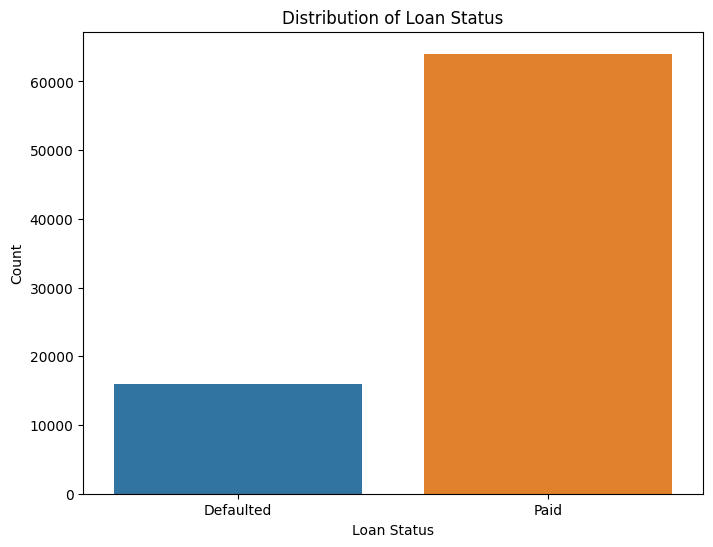

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x='loan_status', data=df_train)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

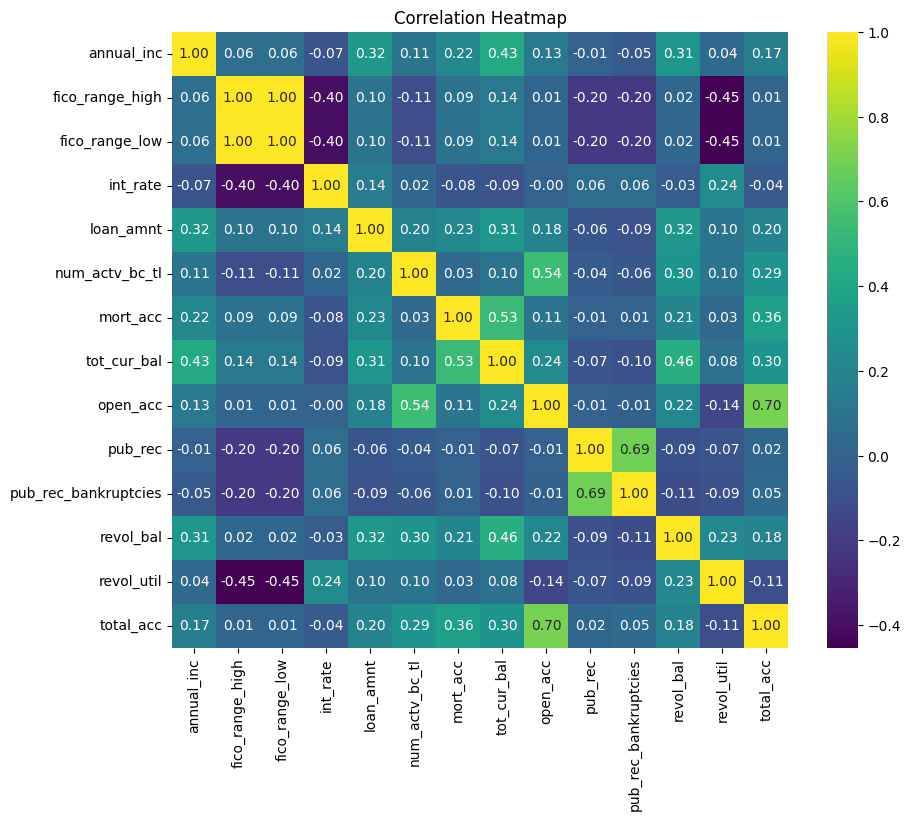

In [13]:

numerical_cols = df_train.select_dtypes(include=['float64', 'int64']).columns
correlation = df_train[numerical_cols].corr()


# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='viridis',square=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

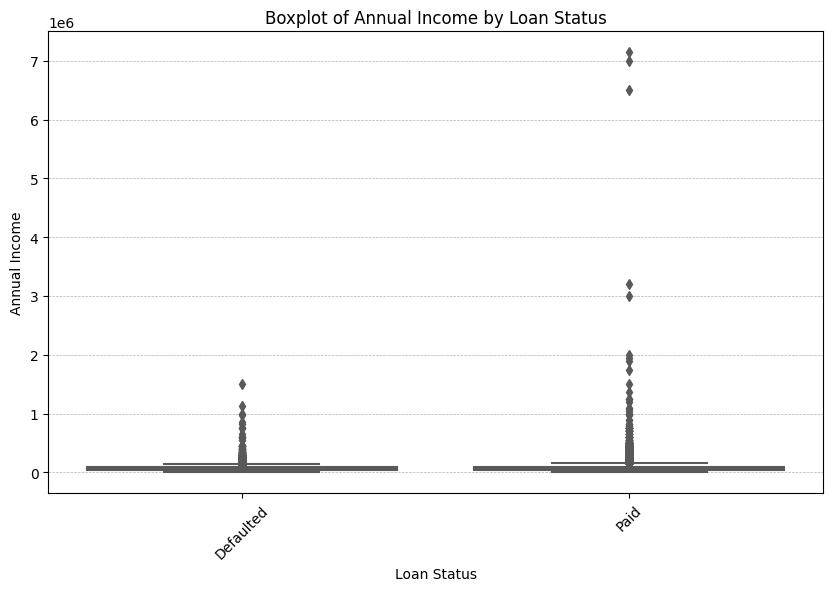

In [14]:
plt.figure(figsize=(10, 6)) 
sns.boxplot(x='loan_status', y='annual_inc', data=df_train, palette='Set2')  
plt.title('Boxplot of Annual Income by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.5)  
plt.show()


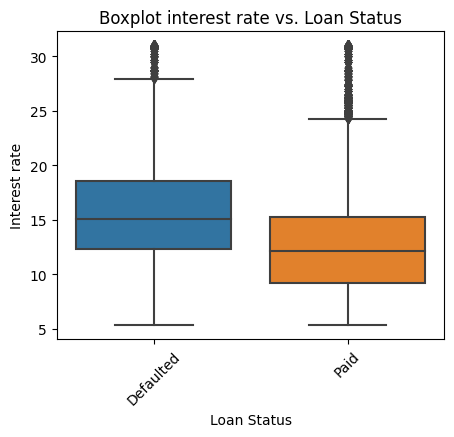

In [15]:
# Boxplot or Violin plot for numerical features against 'loan_status'
plt.figure(figsize=(5,4))
sns.boxplot(x='loan_status', y='int_rate', data=df_train)
plt.title('Boxplot interest rate vs. Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest rate')
plt.xticks(rotation=45)
plt.show()

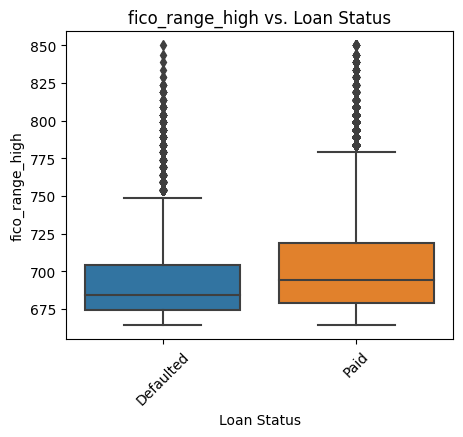

In [16]:
plt.figure(figsize=(5,4))
sns.boxplot(x='loan_status', y='fico_range_high', data=df_train)
plt.title('fico_range_high vs. Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('fico_range_high')
plt.xticks(rotation=45)
plt.show()

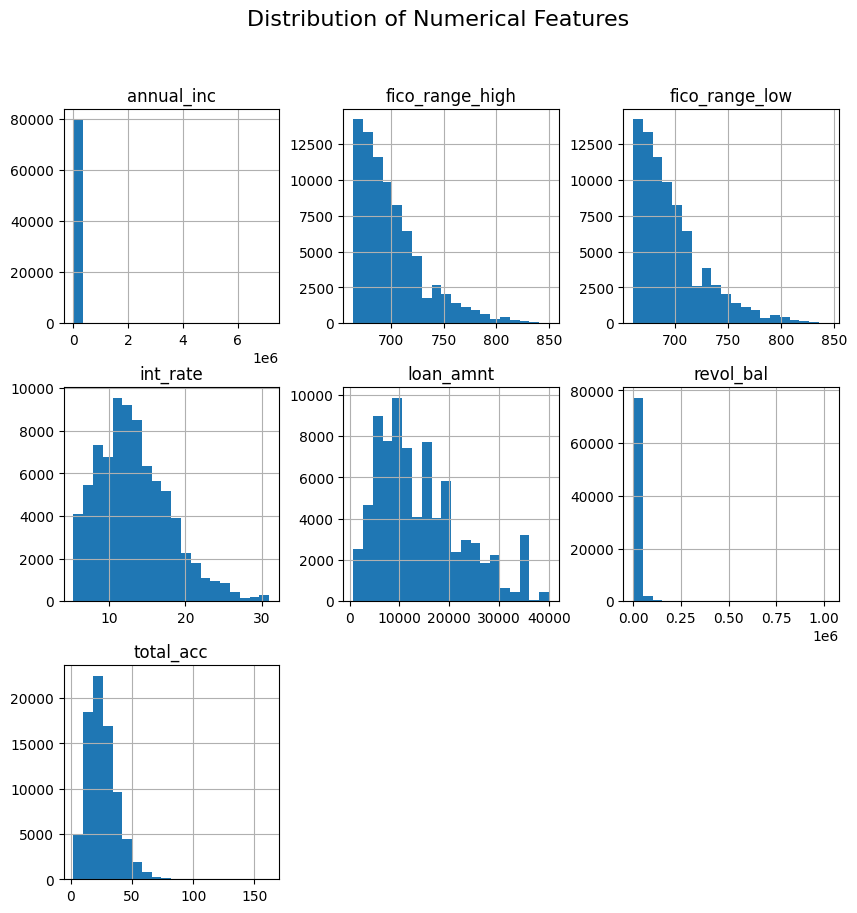

In [17]:
numerical_features = ['annual_inc', 'fico_range_high', 'fico_range_low', 'int_rate', 'loan_amnt', 'revol_bal', 'total_acc']
df_train[numerical_features].hist(bins=20, figsize=(10, 10), layout=(3, 3))
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()

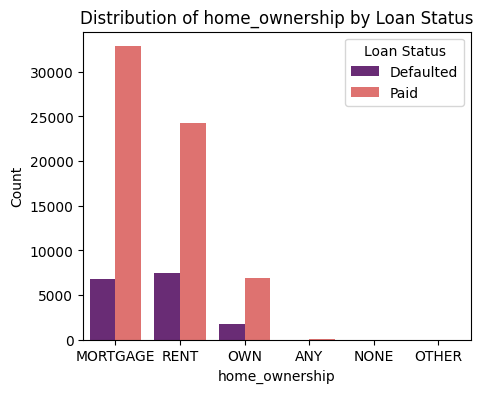

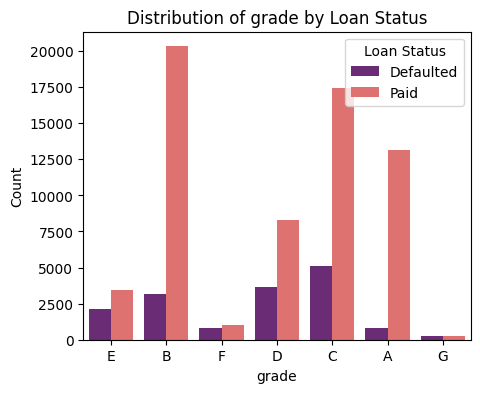

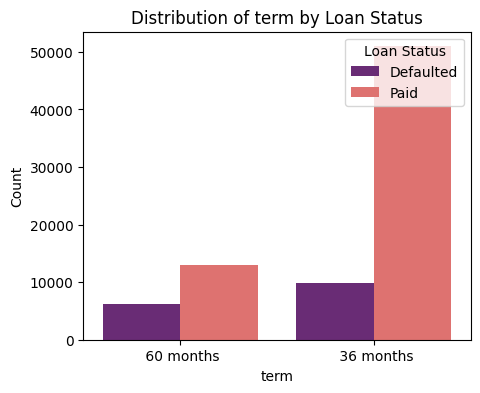

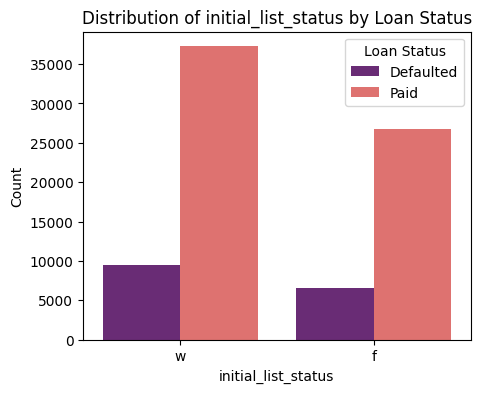

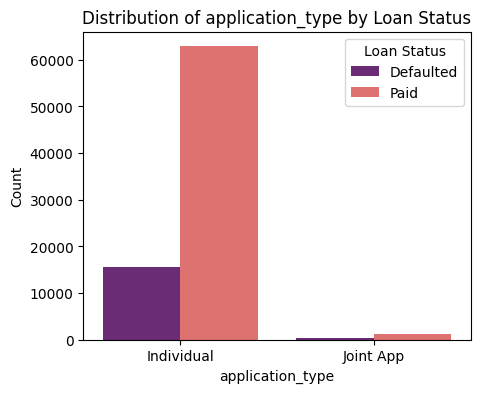

In [18]:
categorical_features = ['home_ownership', 'grade', 'term', 'initial_list_status','application_type']

for feature in categorical_features:
    plt.figure(figsize=(5,4))
    sns.countplot(x=feature, data=df_train, hue='loan_status', palette='magma')  # Change the palette here
    plt.title(f'Distribution of {feature} by Loan Status')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Loan Status', loc='upper right')
    plt.show()


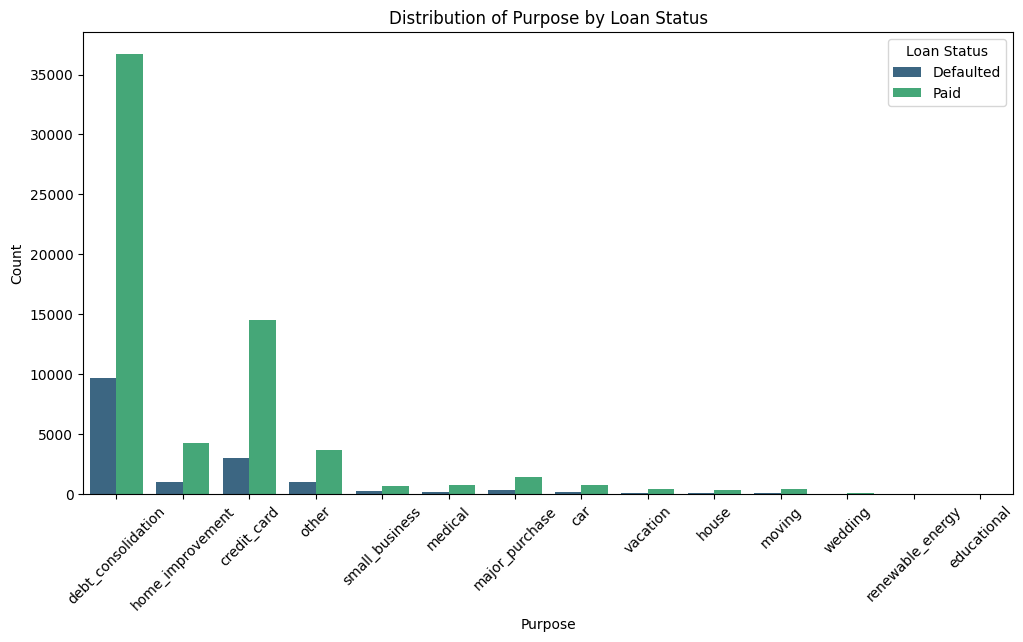

In [19]:
plt.figure(figsize=(12, 6))
sns.countplot(x='purpose', data=df_train, hue='loan_status', palette='viridis')  
plt.title('Distribution of Purpose by Loan Status') 
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right')
plt.xticks(rotation=45) 
plt.show()


In [20]:
#Using info method to have a look at the datatypee, null values and row and column count in the data set 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            80000 non-null  object 
 1   annual_inc            80000 non-null  float64
 2   earliest_cr_line      80000 non-null  object 
 3   emp_length            75412 non-null  object 
 4   emp_title             74982 non-null  object 
 5   fico_range_high       80000 non-null  int64  
 6   fico_range_low        80000 non-null  int64  
 7   grade                 80000 non-null  object 
 8   home_ownership        80000 non-null  object 
 9   application_type      80000 non-null  object 
 10  initial_list_status   80000 non-null  object 
 11  int_rate              80000 non-null  float64
 12  loan_amnt             80000 non-null  int64  
 13  num_actv_bc_tl        76052 non-null  float64
 14  mort_acc              77229 non-null  float64
 15  tot_cur_bal        

In [21]:
df_train['revol_util'].median()

52.2

In [22]:
df_train['pub_rec_bankruptcies'].value_counts()

0.0    69862
1.0     9464
2.0      483
3.0      118
4.0       33
5.0        7
7.0        1
6.0        1
Name: pub_rec_bankruptcies, dtype: int64

In [23]:
df_train['pub_rec_bankruptcies'].median()

0.0

In [24]:
df_train['purpose'].value_counts()

debt_consolidation    46418
credit_card           17506
home_improvement       5268
other                  4683
major_purchase         1746
small_business          950
medical                 902
car                     868
moving                  548
vacation                518
house                   413
wedding                 110
renewable_energy         54
educational              16
Name: purpose, dtype: int64

In [25]:
df_train.describe()

,annual_inc,fico_range_high,fico_range_low,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,total_acc
count,8.000000e+04,80000.000000,80000.000000,80000.000000,80000.000000,76052.000000,77229.000000,7.605200e+04,80000.000000,80000.000000,79969.000000,8.000000e+04,79947.000000,80000.000000
mean,7.604614e+04,699.987975,695.987813,13.232898,14403.867813,3.633790,1.674759,1.415864e+05,11.605675,0.216675,0.137103,1.628934e+04,51.899142,25.036875
std,6.902006e+04,31.734840,31.734075,4.771705,8703.826298,2.262505,2.005104,1.593714e+05,5.483362,0.579854,0.383202,2.264915e+04,24.504836,12.009194
min,0.000000e+00,664.000000,660.000000,5.310000,750.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000
25%,4.600000e+04,674.000000,670.000000,9.750000,7925.000000,2.000000,0.000000,2.964200e+04,8.000000,0.000000,0.000000,5.965750e+03,33.500000,16.000000
50%,6.500000e+04,694.000000,690.000000,12.740000,12000.000000,3.000000,1.000000,8.100050e+04,11.000000,0.000000,0.000000,1.111100e+04,52.200000,23.000000
75%,9.000000e+04,714.000000,710.000000,15.990000,20000.000000,5.000000,3.000000,2.110272e+05,14.000000,0.000000,0.000000,1.963500e+04,70.800000,32.000000
max,7.141778e+06,850.000000,845.000000,30.990000,40000.000000,32.000000,32.000000,5.172185e+06,80.000000,24.000000,7.000000,1.023940e+06,152.600000,162.000000


In [26]:
df_train['emp_length'].value_counts()

10+ years    26278
2 years       7319
3 years       6474
< 1 year      6297
1 year        5294
5 years       5094
4 years       4763
6 years       3691
7 years       3597
8 years       3583
9 years       3022
Name: emp_length, dtype: int64

# Data preprocessing


In [27]:
# re module for regular expressions
#function to extract the numeric part from the strings
def extract_years(emp_length):
    if pd.isna(emp_length):  # Handle NaN values
        return emp_length
    elif emp_length == '< 1 year' or emp_length == 'n/a':  # Handle specific cases
        return 0
    else:
        return int(re.findall(r'\d+', str(emp_length))[0])  # Convert to string before using regular expressions

# Apply the function to the 'emp_length' column of df_train to modify it in place
df_train['emp_length'] = df_train['emp_length'].apply(extract_years)


In [28]:
 # re module for regular expressions

# function to extract the numeric part from the strings
def extract_years(emp_length):
    if pd.isna(emp_length):  # Handle NaN values
        return emp_length
    elif emp_length == '< 1 year' or emp_length == 'n/a':  # Handle specific cases
        return 0
    else:
        return int(re.findall(r'\d+', str(emp_length))[0])  # Convert to string before using regular expressions

# Apply the function to the 'emp_length' column of df_test to modify it in place
df_test['emp_length'] = df_test['emp_length'].apply(extract_years)

In [29]:
df_train['emp_length'].value_counts()

10.0    26278
2.0      7319
3.0      6474
0.0      6297
1.0      5294
5.0      5094
4.0      4763
6.0      3691
7.0      3597
8.0      3583
9.0      3022
Name: emp_length, dtype: int64

In [30]:
df_test['emp_length'].value_counts()

10.0    6579
2.0     1810
0.0     1583
3.0     1580
1.0     1336
5.0     1228
4.0     1190
6.0      957
7.0      874
8.0      836
9.0      769
Name: emp_length, dtype: int64

In [31]:

df_train['emp_length'].isna().sum()

4588

In [32]:
df_test['emp_length'].isna().sum()

1258

In [33]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            80000 non-null  object 
 1   annual_inc            80000 non-null  float64
 2   earliest_cr_line      80000 non-null  object 
 3   emp_length            75412 non-null  float64
 4   emp_title             74982 non-null  object 
 5   fico_range_high       80000 non-null  int64  
 6   fico_range_low        80000 non-null  int64  
 7   grade                 80000 non-null  object 
 8   home_ownership        80000 non-null  object 
 9   application_type      80000 non-null  object 
 10  initial_list_status   80000 non-null  object 
 11  int_rate              80000 non-null  float64
 12  loan_amnt             80000 non-null  int64  
 13  num_actv_bc_tl        76052 non-null  float64
 14  mort_acc              77229 non-null  float64
 15  tot_cur_bal        

In [34]:
median_val_train=df_train['emp_length'].median()
median_val_test=df_test['emp_length'].median()


In [35]:
median_val_test

6.0

In [36]:
median_val_test

6.0

In [38]:
# filling null values in 'emp_length_numeric' with the median
df_train['emp_length'].fillna(median_val_train, inplace=True)

df_test['emp_length'].fillna(median_val_test, inplace=True)


In [39]:
df_test['emp_length'].isna().sum()

0

In [40]:
df_train['emp_length'].isna().sum()

0

In [41]:
df_train['emp_title'].fillna('Not Specified', inplace=True)
df_test['emp_title'].fillna('Not Specified', inplace=True)

In [42]:
df_train['emp_title'].isna().sum()

0

In [43]:
df_test['emp_title'].isna().sum()

0

In [44]:
df_train['title'].fillna('Not Specified', inplace=True)
df_test['title'].fillna('Not Specified', inplace=True)

In [45]:
df_train['title'].isna().sum()

0

In [46]:
df_train['title'].value_counts()

Debt consolidation                  39396
Credit card refinancing             14802
Home improvement                     4542
Other                                4035
Major purchase                       1422
                                    ...  
CREDIT PAYMENT                          1
DebtConsolidate                         1
Card consolidation                      1
Purchase of an ultrasonic welder        1
Consolidate 2012                        1
Name: title, Length: 5349, dtype: int64

In [47]:
df_test['title'].value_counts()

Debt consolidation            9855
Credit card refinancing       3645
Home improvement              1106
Other                         1043
Major purchase                 370
                              ... 
Credit Card repayment            1
Eliminate Debt                   1
Debt Consollidation              1
DEPT DESTROYER                   1
credit card refinance loan       1
Name: title, Length: 1624, dtype: int64

In [48]:
df_train['emp_title'].value_counts()

Not Specified                   5018
Teacher                         1278
Manager                         1194
Owner                            592
RN                               526
                                ... 
Support Services Coordinator       1
C&E Auburn V-Twin, Inc.            1
Media manager                      1
MERCHANDISER                       1
Sports Group Manager               1
Name: emp_title, Length: 36662, dtype: int64

In [49]:
df_train['num_actv_bc_tl'].describe()

count    76052.000000
mean         3.633790
std          2.262505
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         32.000000
Name: num_actv_bc_tl, dtype: float64

In [50]:
median_num_actv_bc_tl = df_train['num_actv_bc_tl'].median()
df_train['num_actv_bc_tl'].fillna(median_num_actv_bc_tl, inplace=True)
median_num_actv_bc_tl = df_test['num_actv_bc_tl'].median()
df_test['num_actv_bc_tl'].fillna(median_num_actv_bc_tl, inplace=True)

In [51]:
median_mort_acc = df_train['mort_acc'].median()
df_train['mort_acc'].fillna(median_mort_acc, inplace=True)
median_mort_acc = df_test['mort_acc'].median()
df_test['mort_acc'].fillna(median_mort_acc, inplace=True)


In [52]:
median_tot_cur_bal = df_train['tot_cur_bal'].median()
df_train['tot_cur_bal'].fillna(median_tot_cur_bal, inplace=True)
median_tot_cur_bal = df_test['tot_cur_bal'].median()
df_test['tot_cur_bal'].fillna(median_tot_cur_bal, inplace=True)


In [53]:

mode_pub_rec_bankruptcies = df_train['pub_rec_bankruptcies'].mode()[0]
df_train['pub_rec_bankruptcies'].fillna(mode_pub_rec_bankruptcies, inplace=True)
mode_pub_rec_bankruptcies = df_test['pub_rec_bankruptcies'].mode()[0]
df_test['pub_rec_bankruptcies'].fillna(mode_pub_rec_bankruptcies, inplace=True)


In [54]:
#Filling missing values with the median of the column.
median_revol_util = df_train['revol_util'].median()
df_train['revol_util'].fillna(median_revol_util, inplace=True)
median_revol_util = df_test['revol_util'].median()
df_test['revol_util'].fillna(median_revol_util, inplace=True)


In [55]:
df_train.isna().sum()

addr_state              0
annual_inc              0
earliest_cr_line        0
emp_length              0
emp_title               0
fico_range_high         0
fico_range_low          0
grade                   0
home_ownership          0
application_type        0
initial_list_status     0
int_rate                0
loan_amnt               0
num_actv_bc_tl          0
mort_acc                0
tot_cur_bal             0
open_acc                0
pub_rec                 0
pub_rec_bankruptcies    0
purpose                 0
revol_bal               0
revol_util              0
sub_grade               0
term                    0
title                   0
total_acc               0
verification_status     0
loan_status             0
dtype: int64

# Missing values are now handled using median, mode or new category built as the case and column requirements

In [56]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            80000 non-null  object 
 1   annual_inc            80000 non-null  float64
 2   earliest_cr_line      80000 non-null  object 
 3   emp_length            80000 non-null  float64
 4   emp_title             80000 non-null  object 
 5   fico_range_high       80000 non-null  int64  
 6   fico_range_low        80000 non-null  int64  
 7   grade                 80000 non-null  object 
 8   home_ownership        80000 non-null  object 
 9   application_type      80000 non-null  object 
 10  initial_list_status   80000 non-null  object 
 11  int_rate              80000 non-null  float64
 12  loan_amnt             80000 non-null  int64  
 13  num_actv_bc_tl        80000 non-null  float64
 14  mort_acc              80000 non-null  float64
 15  tot_cur_bal        

In [57]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            20000 non-null  object 
 1   annual_inc            20000 non-null  float64
 2   earliest_cr_line      20000 non-null  object 
 3   emp_length            20000 non-null  float64
 4   emp_title             20000 non-null  object 
 5   fico_range_high       20000 non-null  float64
 6   fico_range_low        20000 non-null  float64
 7   grade                 20000 non-null  object 
 8   home_ownership        20000 non-null  object 
 9   application_type      20000 non-null  object 
 10  initial_list_status   20000 non-null  object 
 11  int_rate              20000 non-null  float64
 12  loan_amnt             20000 non-null  float64
 13  num_actv_bc_tl        20000 non-null  float64
 14  mort_acc              20000 non-null  float64
 15  tot_cur_bal        

In [58]:
df_train['addr_state'].value_counts()

CA    11744
TX     6493
NY     6461
FL     5618
IL     3098
NJ     2853
PA     2676
OH     2575
GA     2530
NC     2291
VA     2249
MI     2091
AZ     1993
MA     1862
MD     1802
CO     1790
WA     1736
MN     1414
IN     1329
MO     1298
NV     1224
TN     1207
CT     1143
WI     1043
OR     1025
SC     1007
AL      986
LA      928
KY      836
OK      725
KS      649
AR      590
UT      554
NM      440
HI      404
NH      373
MS      373
RI      356
WV      268
NE      240
MT      229
DE      219
AK      215
DC      201
SD      192
WY      187
VT      181
ME      110
ID      106
ND       85
IA        1
Name: addr_state, dtype: int64

In [59]:
df_test['addr_state'].value_counts()

CA    2865
TX    1718
NY    1632
FL    1366
IL     794
NJ     722
OH     691
PA     683
GA     652
NC     596
VA     580
AZ     506
MI     504
MD     463
WA     450
MA     424
CO     417
MN     352
MO     307
IN     304
CT     290
TN     287
NV     284
SC     262
LA     261
OR     254
WI     254
AL     244
KY     203
OK     196
KS     184
AR     149
UT     142
HI      98
NM      94
RI      84
MS      83
NH      77
WV      73
NE      63
DE      62
MT      51
DC      51
AK      50
ME      37
SD      36
VT      31
WY      30
ND      25
ID      19
Name: addr_state, dtype: int64

In [60]:
# function to map states to regions
def map_region(state):
    if state in ['WA', 'OR', 'CA', 'AK', 'HI']:
        return 'West'
    elif state in ['ID', 'MT', 'WY', 'NV', 'UT', 'CO', 'AZ', 'NM']:
        return 'West'
    elif state in ['ND', 'SD', 'NE', 'KS', 'OK', 'TX', 'MN', 'IA', 'MO', 'AR', 'LA']:
        return 'Midwest'
    elif state in ['WI', 'IL', 'IN', 'MI', 'OH', 'KY']:
        return 'Midwest'
    elif state in ['MS', 'AL', 'TN', 'GA', 'FL', 'SC', 'NC', 'VA', 'WV', 'MD', 'DE', 'DC']:
        return 'South'
    elif state in ['PA', 'NY', 'NJ', 'CT', 'RI', 'MA', 'NH', 'VT', 'ME']:
        return 'Northeast'
    else:
        return 'Other'

# new column for regions
df_train['region'] = df_train['addr_state'].apply(map_region)

In [61]:
# function to map states to regions
def map_region(state):
    if state in ['WA', 'OR', 'CA', 'AK', 'HI']:
        return 'West'
    elif state in ['ID', 'MT', 'WY', 'NV', 'UT', 'CO', 'AZ', 'NM']:
        return 'West'
    elif state in ['ND', 'SD', 'NE', 'KS', 'OK', 'TX', 'MN', 'IA', 'MO', 'AR', 'LA']:
        return 'Midwest'
    elif state in ['WI', 'IL', 'IN', 'MI', 'OH', 'KY']:
        return 'Midwest'
    elif state in ['MS', 'AL', 'TN', 'GA', 'FL', 'SC', 'NC', 'VA', 'WV', 'MD', 'DE', 'DC']:
        return 'South'
    elif state in ['PA', 'NY', 'NJ', 'CT', 'RI', 'MA', 'NH', 'VT', 'ME']:
        return 'Northeast'
    else:
        return 'Other'

# new column for regions
df_test['region'] = df_test['addr_state'].apply(map_region)

In [62]:
# Using value counts methods to look spread of borrowers in different regions.
df_train['region'].value_counts()

Midwest      23587
West         21647
South        18751
Northeast    16015
Name: region, dtype: int64

In [63]:
df_test['region'].value_counts()

Midwest      6041
West         5260
South        4719
Northeast    3980
Name: region, dtype: int64

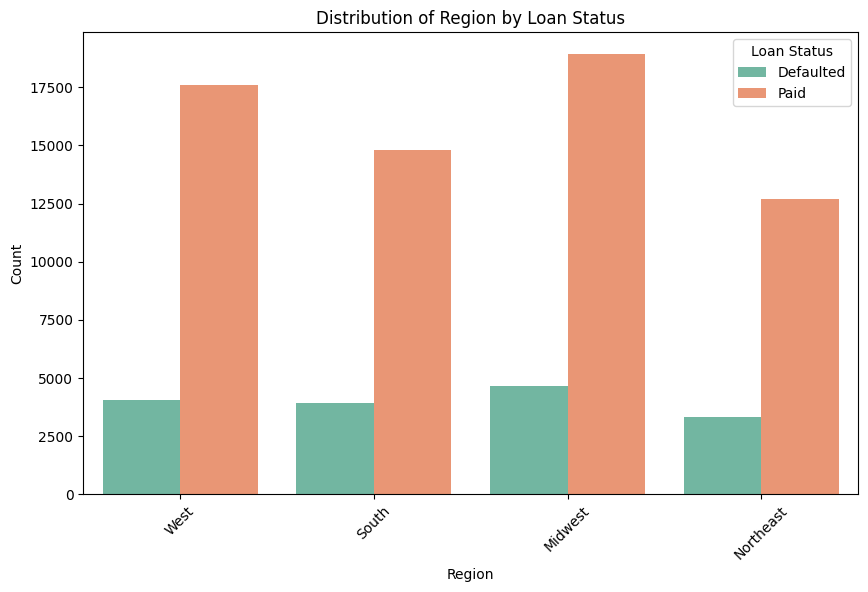

In [64]:
plt.figure(figsize=(10, 6))
sns.countplot(x='region', data=df_train, hue='loan_status', palette='Set2')
plt.title('Distribution of Region by Loan Status')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right')
plt.xticks(rotation=45)
plt.show()


In [65]:
# New column Region is added to the dataframe
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            80000 non-null  object 
 1   annual_inc            80000 non-null  float64
 2   earliest_cr_line      80000 non-null  object 
 3   emp_length            80000 non-null  float64
 4   emp_title             80000 non-null  object 
 5   fico_range_high       80000 non-null  int64  
 6   fico_range_low        80000 non-null  int64  
 7   grade                 80000 non-null  object 
 8   home_ownership        80000 non-null  object 
 9   application_type      80000 non-null  object 
 10  initial_list_status   80000 non-null  object 
 11  int_rate              80000 non-null  float64
 12  loan_amnt             80000 non-null  int64  
 13  num_actv_bc_tl        80000 non-null  float64
 14  mort_acc              80000 non-null  float64
 15  tot_cur_bal        

In [66]:
# Describe method shows earliest_cr_line: The month the borrower's earliest reported credit line was opened, 
# the data type of the column as object, for better analysis and in order to gain insights from it
# is converted to datetime to gain more insights from it 

# format being mmm yy
df_train['earliest_cr_line'].describe()

count      80000
unique       640
top       Sep-03
freq         547
Name: earliest_cr_line, dtype: object

In [67]:
# here the format being mmm YYYY 
df_test['earliest_cr_line'].describe()

count        20000
unique         568
top       Oct-2001
freq           160
Name: earliest_cr_line, dtype: object

In [68]:
# Convert 'earliest_cr_line' to datetime format
df_train['earliest_cr_line'] = pd.to_datetime(df_train['earliest_cr_line'], format='%b-%y')
df_test['earliest_cr_line'] = pd.to_datetime(df_test['earliest_cr_line'], format='%b-%Y')


In [69]:
df_train['earliest_cr_line'].describe(datetime_is_numeric=True)

count                         80000
mean     1999-06-07 05:45:06.840000
min             1969-01-01 00:00:00
25%             1995-05-01 00:00:00
50%             2000-08-01 00:00:00
75%             2004-07-01 00:00:00
max             2068-12-01 00:00:00
Name: earliest_cr_line, dtype: object

here the "2068-12-01" date is seems an error, correcting it by assuming it was meant to be a date in the past or within a reasonable range. For example "1968-12-01" now it aligns with the rest of the data.
Replacing the incorrect date with a valid date using DataFrame methods in Python.

In [70]:
# Converting the 'earliest_cr_line' column to datetime format
df_train['earliest_cr_line'] = pd.to_datetime(df_train['earliest_cr_line'], errors='coerce')

# rows with dates beyond a reasonable range 
future_dates_mask = df_train['earliest_cr_line'] > pd.Timestamp.now()

# Replace future dates with a default or corrected date (e.g., '1968-12-01')
df_train.loc[future_dates_mask, 'earliest_cr_line'] = pd.to_datetime('1968-12-01')

# Check the changes
print(df_train['earliest_cr_line'].max()) 


2015-08-01 00:00:00


In [71]:
# Converting the 'earliest_cr_line' column to datetime format
df_test['earliest_cr_line'] = pd.to_datetime(df_test['earliest_cr_line'], errors='coerce')

# rows with dates beyond a reasonable range )
future_dates_mask = df_test['earliest_cr_line'] > pd.Timestamp.now()

# Replace future dates with a default or corrected date (e.g., '1968-12-01')
df_test.loc[future_dates_mask, 'earliest_cr_line'] = pd.to_datetime('1968-12-01')

# Check the changes
print(df_test['earliest_cr_line'].max()) 

2015-03-01 00:00:00


In [72]:
df_train['earliest_cr_line'].describe(datetime_is_numeric=True)

count                         80000
mean     1999-03-10 02:10:06.240000
min             1968-12-01 00:00:00
25%             1995-04-01 00:00:00
50%             2000-08-01 00:00:00
75%             2004-06-01 00:00:00
max             2015-08-01 00:00:00
Name: earliest_cr_line, dtype: object

In [73]:
#credit history length

current_date = datetime.now()
df_train['credit_history'] = (current_date - df_train['earliest_cr_line']).dt.days

In [74]:
current_date = datetime.now()
df_test['credit_history'] = (current_date - df_test['earliest_cr_line']).dt.days

In [75]:
df_train['credit_history'].describe()

count    80000.000000
mean      9160.909650
std       2759.363535
min       3173.000000
25%       7251.000000
50%       8651.000000
75%      10600.000000
max      20217.000000
Name: credit_history, dtype: float64

A FICO Score is a three-digit number between 300 and 850 that tells lenders and other creditors how likely you are to make on-time bill payments. Not only does it help lenders evaluate the level of risk you pose as a borrower.
We are here provided with low and high range if FICO score so thaking its average and feature engineering a new column called 
fico_score_average in order to reduce dimensions and having a big picture on its impact on target column.

In [76]:
# Calculate FICO Score Average
df_train['fico_score_average'] = (df_train['fico_range_high'] + df_train['fico_range_low']) / 2
df_test['fico_score_average'] = (df_test['fico_range_high'] + df_test['fico_range_low']) / 2

In [77]:
df_train['fico_score_average']

0        742.0
1        722.0
2        677.0
3        662.0
4        667.0
         ...  
79995    662.0
79996    682.0
79997    722.0
79998    667.0
79999    662.0
Name: fico_score_average, Length: 80000, dtype: float64

In [78]:
df_test['fico_score_average']

0        717.0
1        682.0
2        677.0
3        672.0
4        702.0
         ...  
19995    677.0
19996    672.0
19997    727.0
19998    807.0
19999    662.0
Name: fico_score_average, Length: 20000, dtype: float64

In [79]:
numerical_columns = df_train.select_dtypes(include=['number'])
numerical_columns

,annual_inc,emp_length,fico_range_high,fico_range_low,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,total_acc,credit_history,fico_score_average
0,85000.0,10.0,744,740,18.99,18075,1.0,1.0,319479.0,7,0,0.0,5338,93.6,8,9778,742.0
1,40000.0,10.0,724,720,10.16,8800,4.0,0.0,19944.0,5,0,0.0,19944,60.3,12,13522,722.0
2,60000.0,10.0,679,675,11.47,18000,4.0,2.0,23199.0,7,0,0.0,23199,88.5,16,6095,677.0
3,100742.0,10.0,664,660,9.16,20000,4.0,1.0,72651.0,12,0,0.0,18425,69.0,19,15925,662.0
4,80000.0,10.0,669,665,23.83,35000,14.0,7.0,64631.0,23,0,0.0,34370,90.0,59,9048,667.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,81000.0,10.0,664,660,25.89,25850,5.0,4.0,220521.0,12,0,0.0,20201,93.5,42,8833,662.0
79996,45000.0,10.0,684,680,12.29,6975,2.0,2.0,245781.0,7,0,0.0,6145,56.9,14,10478,682.0
79997,90000.0,0.0,724,720,10.99,7000,1.0,3.0,382274.0,9,0,0.0,3910,25.6,26,6947,722.0
79998,94000.0,3.0,669,665,19.47,18000,3.0,3.0,201841.0,16,1,1.0,11897,49.4,48,11695,667.0


In [80]:
numerical_col = df_test.select_dtypes(include=['number'])
numerical_col

,annual_inc,emp_length,fico_range_high,fico_range_low,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,total_acc,credit_history,fico_score_average
0,50000.0,1.0,719.0,715.0,13.99,5000.0,1.0,0.0,33395.0,9.0,0.0,0.0,2568.0,9.8,11.0,4360,717.0
1,92000.0,10.0,684.0,680.0,10.99,30000.0,2.0,2.0,229832.0,11.0,0.0,0.0,30394.0,75.4,35.0,8164,682.0
2,89000.0,10.0,679.0,675.0,10.15,16000.0,5.0,2.0,181616.0,15.0,0.0,0.0,38400.0,75.3,41.0,12822,677.0
3,33000.0,9.0,674.0,670.0,13.68,10000.0,6.0,0.0,30603.0,12.0,1.0,1.0,21224.0,69.4,16.0,7098,672.0
4,35580.0,6.0,704.0,700.0,14.09,4000.0,2.0,4.0,124597.0,8.0,0.0,0.0,3471.0,39.4,19.0,9928,702.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,38500.0,4.0,679.0,675.0,17.57,10000.0,1.0,0.0,30397.0,10.0,0.0,0.0,5816.0,60.0,10.0,4968,677.0
19996,80000.0,3.0,674.0,670.0,18.92,18375.0,2.0,5.0,494439.0,9.0,0.0,0.0,13886.0,75.1,30.0,9260,672.0
19997,95000.0,10.0,729.0,725.0,11.22,35000.0,2.0,4.0,284915.0,10.0,0.0,0.0,43166.0,60.7,29.0,10204,727.0
19998,35000.0,10.0,809.0,805.0,7.89,5000.0,1.0,0.0,8205.0,9.0,0.0,0.0,1110.0,4.4,19.0,7709,807.0


# Checking the skewness inherent in the dataset and finding ways to deal with it 

In [81]:
skewness = numerical_columns.apply(skew)
kurtosis = numerical_columns.apply(kurtosis)
skewness


annual_inc              41.325112
emp_length              -0.221546
fico_range_high          1.291789
fico_range_low           1.291557
int_rate                 0.714063
loan_amnt                0.787598
num_actv_bc_tl           1.522771
mort_acc                 1.743258
tot_cur_bal              3.409199
open_acc                 1.267728
pub_rec                  5.355785
pub_rec_bankruptcies     3.339581
revol_bal                9.942102
revol_util              -0.067516
total_acc                0.963298
credit_history           0.964588
fico_score_average       1.291672
dtype: float64

In [82]:
kurtosis

annual_inc              3713.071035
emp_length                -1.408000
fico_range_high            1.693036
fico_range_low             1.691373
int_rate                   0.501512
loan_amnt                 -0.066675
num_actv_bc_tl             4.886498
mort_acc                   6.277024
tot_cur_bal               37.217442
open_acc                   3.088862
pub_rec                   74.059153
pub_rec_bankruptcies      16.538499
revol_bal                202.584088
revol_util                -0.802884
total_acc                  1.736839
credit_history             1.244372
fico_score_average         1.692199
dtype: float64

In [92]:
# Defining a function to calculate IQR and identify outliers
def identify_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((column < lower_bound) | (column > upper_bound))
    return outliers, lower_bound, upper_bound

In [93]:
# Identify outliers for 'annual_inc', 'loan_amnt','int_rate','tot_cur_bal' and 'revol_bal'.

outliers_annual_inc, lb_annual_inc, ub_annual_inc = identify_outliers(df_train['annual_inc'])
outliers_loan_amnt, lb_loan_amnt, ub_loan_amnt = identify_outliers(df_train['loan_amnt'])
outliers_int_rate, lb_int_rate, ub_int_rate = identify_outliers(df_train['int_rate'])
outliers_tot_cur_bal, lb_tot_cur_bal, ub_tot_cur_bal = identify_outliers(df_train['tot_cur_bal'])
outliers_revol_bal, lb_revol_bal, ub_revol_bal = identify_outliers(df_train['revol_bal'])

In [94]:
# Count the number of outliers in these columns
outliers_counts = {
    'annual_inc': outliers_annual_inc.sum(),
    'loan_amnt': outliers_loan_amnt.sum(),
    'int_rate': outliers_int_rate.sum(),
    'tot_cur_bal': outliers_tot_cur_bal.sum(),
    'revol_bal': outliers_revol_bal.sum()
}
outliers_counts

{'annual_inc': 3896,
 'loan_amnt': 431,
 'int_rate': 1497,
 'tot_cur_bal': 3056,
 'revol_bal': 4806}

In [95]:
lb_annual_inc, ub_annual_inc


(-20000.0, 156000.0)

In [96]:

df_train['annual_inc'] = df_train['annual_inc'].clip(upper=156000)

In [97]:
lb_loan_amnt, ub_loan_amnt


(-10187.5, 38112.5)

In [98]:
df_train['loan_amnt'] = df_train['loan_amnt'].clip(upper=38112.5) 

In [99]:
lb_int_rate, ub_int_rate

(0.39000000000000057, 25.35)

In [100]:
df_train['int_rate'] = df_train['int_rate'].clip(upper=25.35)

In [101]:
lb_tot_cur_bal, ub_tot_cur_bal

(-227627.75, 462378.25)

In [102]:
df_train['tot_cur_bal'] = df_train['tot_cur_bal'].clip(upper=462378.25)

In [103]:
lb_revol_bal, ub_revol_bal

(-14538.125, 40138.875)

In [104]:
df_train['revol_bal'] = df_train['revol_bal'].clip(upper=40138.875)

In [105]:
# Defining a function to calculate IQR and identify outliers
def identify_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((column < lower_bound) | (column > upper_bound))
    return outliers, lower_bound, upper_bound
# Identify outliers for 'annual_inc', 'loan_amnt','int_rate','tot_cur_bal' and 'revol_bal'.
outliers_annual_inc, lb_annual_inc, ub_annual_inc = identify_outliers(df_test['annual_inc'])
outliers_loan_amnt, lb_loan_amnt, ub_loan_amnt = identify_outliers(df_test['loan_amnt'])
outliers_int_rate, lb_int_rate, ub_int_rate = identify_outliers(df_test['int_rate'])
outliers_tot_cur_bal, lb_tot_cur_bal, ub_tot_cur_bal = identify_outliers(df_test['tot_cur_bal'])
outliers_revol_bal, lb_revol_bal, ub_revol_bal = identify_outliers(df_test['revol_bal'])
# Count the number of outliers in these columns
outliers_counts = {
    'annual_inc': outliers_annual_inc.sum(),
    'loan_amnt': outliers_loan_amnt.sum(),
    'int_rate': outliers_int_rate.sum(),
    'tot_cur_bal': outliers_tot_cur_bal.sum(),
    'revol_bal': outliers_revol_bal.sum()
}
outliers_counts

{'annual_inc': 974,
 'loan_amnt': 0,
 'int_rate': 0,
 'tot_cur_bal': 0,
 'revol_bal': 1135}

In [106]:
lb_annual_inc, ub_annual_inc

(-22500.0, 157500.0)

In [107]:
df_test['annual_inc'] = df_test['annual_inc'].clip(upper=157500.0)

In [108]:
lb_loan_amnt, ub_loan_amnt

(-10500.0, 38300.0)

In [109]:
df_test['loan_amnt'] = df_test['loan_amnt'].clip(upper=38300.0) 

In [110]:
lb_int_rate, ub_int_rate

(0.34500000000000064, 25.424999999999997)

In [111]:
df_test['int_rate'] = df_test['int_rate'].clip(upper=25.424999999999997)

In [112]:
lb_tot_cur_bal, ub_tot_cur_bal

(-226649.375, 460709.625)

In [113]:
df_test['tot_cur_bal'] = df_test['tot_cur_bal'].clip(upper=460709.625)

In [114]:
lb_revol_bal, ub_revol_bal

(-15305.0, 40985.0)

In [115]:
df_train['revol_bal'] = df_train['revol_bal'].clip(upper=40985.0)

In [116]:
df_train[['annual_inc', 'loan_amnt', 'int_rate','revol_bal','revol_util']].describe()

,annual_inc,loan_amnt,int_rate,revol_bal,revol_util
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,72100.191347,14394.061719,13.191622,14220.827516,51.899342
std,34838.989564,8676.012724,4.648245,10899.165917,24.496719
min,0.000000,750.000000,5.310000,0.000000,0.000000
25%,46000.000000,7925.000000,9.750000,5965.750000,33.500000
50%,65000.000000,12000.000000,12.740000,11111.000000,52.200000
75%,90000.000000,20000.000000,15.990000,19635.000000,70.800000
max,156000.000000,38112.500000,25.350000,40138.875000,152.600000


In [117]:
df_test[['annual_inc', 'loan_amnt', 'int_rate','revol_bal','revol_util']].describe()

,annual_inc,loan_amnt,int_rate,revol_bal,revol_util
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,72269.359370,14417.608750,13.221551,16181.77750,51.710065
std,35240.755638,8785.919215,4.658163,21917.28208,24.501754
min,0.000000,1000.000000,5.310000,0.00000,0.000000
25%,45000.000000,7800.000000,9.750000,5803.75000,33.200000
50%,65000.000000,12000.000000,12.790000,11051.50000,52.200000
75%,90000.000000,20000.000000,16.020000,19876.25000,70.600000
max,157500.000000,38300.000000,25.425000,921464.00000,127.600000


In [118]:
df_train.describe()

,annual_inc,emp_length,fico_range_high,fico_range_low,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,total_acc,credit_history,fico_score_average
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,72100.191347,5.967137,699.987975,695.987813,13.191622,14394.061719,3.602513,1.651388,131905.477175,11.605675,0.216675,0.137050,14220.827516,51.899342,25.036875,9160.909650,697.987894
std,34838.989564,3.577813,31.734840,31.734075,4.648245,8676.012724,2.210238,1.973931,127396.653274,5.483362,0.579854,0.383137,10899.165917,24.496719,12.009194,2759.363535,31.734457
min,0.000000,0.000000,664.000000,660.000000,5.310000,750.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3173.000000,662.000000
25%,46000.000000,3.000000,674.000000,670.000000,9.750000,7925.000000,2.000000,0.000000,31124.500000,8.000000,0.000000,0.000000,5965.750000,33.500000,16.000000,7251.000000,672.000000
50%,65000.000000,6.000000,694.000000,690.000000,12.740000,12000.000000,3.000000,1.000000,81000.500000,11.000000,0.000000,0.000000,11111.000000,52.200000,23.000000,8651.000000,692.000000
75%,90000.000000,10.000000,714.000000,710.000000,15.990000,20000.000000,5.000000,3.000000,203626.000000,14.000000,0.000000,0.000000,19635.000000,70.800000,32.000000,10600.000000,712.000000
max,156000.000000,10.000000,850.000000,845.000000,25.350000,38112.500000,32.000000,32.000000,462378.250000,80.000000,24.000000,7.000000,40138.875000,152.600000,162.000000,20217.000000,847.500000


In [119]:
numerical_column = df_train.select_dtypes(include=['number'])
numerical_column

,annual_inc,emp_length,fico_range_high,fico_range_low,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,total_acc,credit_history,fico_score_average
0,85000.0,10.0,744,740,18.99,18075.0,1.0,1.0,319479.00,7,0,0.0,5338.000,93.6,8,9778,742.0
1,40000.0,10.0,724,720,10.16,8800.0,4.0,0.0,19944.00,5,0,0.0,19944.000,60.3,12,13522,722.0
2,60000.0,10.0,679,675,11.47,18000.0,4.0,2.0,23199.00,7,0,0.0,23199.000,88.5,16,6095,677.0
3,100742.0,10.0,664,660,9.16,20000.0,4.0,1.0,72651.00,12,0,0.0,18425.000,69.0,19,15925,662.0
4,80000.0,10.0,669,665,23.83,35000.0,14.0,7.0,64631.00,23,0,0.0,34370.000,90.0,59,9048,667.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,81000.0,10.0,664,660,25.35,25850.0,5.0,4.0,220521.00,12,0,0.0,20201.000,93.5,42,8833,662.0
79996,45000.0,10.0,684,680,12.29,6975.0,2.0,2.0,245781.00,7,0,0.0,6145.000,56.9,14,10478,682.0
79997,90000.0,0.0,724,720,10.99,7000.0,1.0,3.0,382274.00,9,0,0.0,3910.000,25.6,26,6947,722.0
79998,94000.0,3.0,669,665,19.47,18000.0,3.0,3.0,201841.00,16,1,1.0,11897.000,49.4,48,11695,667.0


In [120]:
numerical_col = df_test.select_dtypes(include=['number'])
numerical_col

,annual_inc,emp_length,fico_range_high,fico_range_low,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,total_acc,credit_history,fico_score_average
0,50000.0,1.0,719.0,715.0,13.99,5000.0,1.0,0.0,33395.000,9.0,0.0,0.0,2568.0,9.8,11.0,4360,717.0
1,92000.0,10.0,684.0,680.0,10.99,30000.0,2.0,2.0,229832.000,11.0,0.0,0.0,30394.0,75.4,35.0,8164,682.0
2,89000.0,10.0,679.0,675.0,10.15,16000.0,5.0,2.0,181616.000,15.0,0.0,0.0,38400.0,75.3,41.0,12822,677.0
3,33000.0,9.0,674.0,670.0,13.68,10000.0,6.0,0.0,30603.000,12.0,1.0,1.0,21224.0,69.4,16.0,7098,672.0
4,35580.0,6.0,704.0,700.0,14.09,4000.0,2.0,4.0,124597.000,8.0,0.0,0.0,3471.0,39.4,19.0,9928,702.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,38500.0,4.0,679.0,675.0,17.57,10000.0,1.0,0.0,30397.000,10.0,0.0,0.0,5816.0,60.0,10.0,4968,677.0
19996,80000.0,3.0,674.0,670.0,18.92,18375.0,2.0,5.0,460709.625,9.0,0.0,0.0,13886.0,75.1,30.0,9260,672.0
19997,95000.0,10.0,729.0,725.0,11.22,35000.0,2.0,4.0,284915.000,10.0,0.0,0.0,43166.0,60.7,29.0,10204,727.0
19998,35000.0,10.0,809.0,805.0,7.89,5000.0,1.0,0.0,8205.000,9.0,0.0,0.0,1110.0,4.4,19.0,7709,807.0


In [121]:
numerical_column.columns

Index(['annual_inc', 'emp_length', 'fico_range_high', 'fico_range_low',
       'int_rate', 'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal',
       'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'revol_bal',
       'revol_util', 'total_acc', 'credit_history', 'fico_score_average'],
      dtype='object')

In [122]:
numerical_col.columns

Index(['annual_inc', 'emp_length', 'fico_range_high', 'fico_range_low',
       'int_rate', 'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal',
       'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'revol_bal',
       'revol_util', 'total_acc', 'credit_history', 'fico_score_average'],
      dtype='object')

In [123]:
categorical_column = df_train.select_dtypes(include=['object'])
categorical_column

,addr_state,emp_title,grade,home_ownership,application_type,initial_list_status,purpose,sub_grade,term,title,verification_status,loan_status,region
0,CO,Deputy,E,MORTGAGE,Individual,w,debt_consolidation,E1,60 months,Debt consolidation,Source Verified,Defaulted,West
1,CA,Department of Veterans Affairs,B,RENT,Individual,w,debt_consolidation,B1,36 months,Credit Loan,Verified,Paid,West
2,FL,Marble polishing,B,MORTGAGE,Individual,w,debt_consolidation,B5,36 months,Debt consolidation,Source Verified,Paid,South
3,IL,printer,B,MORTGAGE,Individual,w,debt_consolidation,B2,36 months,Debt consolidation,Source Verified,Paid,Midwest
4,MD,Southern Mgmt,F,RENT,Individual,f,debt_consolidation,F5,60 months,Debt Connsolidation,Verified,Paid,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,SC,Sports Group Manager,G,MORTGAGE,Individual,w,debt_consolidation,G3,60 months,Debt consolidation,Verified,Defaulted,South
79996,NH,Web Designer,C,MORTGAGE,Individual,w,debt_consolidation,C1,36 months,Debt consolidation,Not Verified,Paid,Northeast
79997,NY,Program Officer,B,OWN,Individual,w,debt_consolidation,B4,36 months,Debt consolidation,Source Verified,Paid,Northeast
79998,TX,Sr. Business Analyst,D,MORTGAGE,Individual,w,credit_card,D5,60 months,Credit card refinancing,Source Verified,Paid,Midwest


In [124]:
categorical_column.describe(include='object')

,addr_state,emp_title,grade,home_ownership,application_type,initial_list_status,purpose,sub_grade,term,title,verification_status,loan_status,region
count,80000,80000,80000,80000,80000,80000,80000,80000,80000,80000,80000,80000,80000
unique,51,36662,7,6,2,2,14,35,2,5349,3,2,4
top,CA,Not Specified,B,MORTGAGE,Individual,w,debt_consolidation,C1,36 months,Debt consolidation,Source Verified,Paid,Midwest
freq,11744,5018,23502,39628,78446,46745,46418,4982,60750,39396,30855,64030,23587


In [125]:
categorical_column.columns

Index(['addr_state', 'emp_title', 'grade', 'home_ownership',
       'application_type', 'initial_list_status', 'purpose', 'sub_grade',
       'term', 'title', 'verification_status', 'loan_status', 'region'],
      dtype='object')

In [126]:
categorical_col = df_test.select_dtypes(include=['object'])
categorical_col

,addr_state,emp_title,grade,home_ownership,application_type,initial_list_status,purpose,sub_grade,term,title,verification_status,region
0,MO,Tower technician,C,OWN,Individual,f,debt_consolidation,C4,36 months,Debt consolidation,Source Verified,Midwest
1,HI,Supervisor,B,RENT,Individual,f,debt_consolidation,B2,36 months,Debt consolidation,Source Verified,West
2,TX,APPLICATIONS PROGRAMMER,B,MORTGAGE,Individual,w,credit_card,B2,60 months,Credit card refinancing,Not Verified,Midwest
3,CA,San Diego Unified School District,C,RENT,Individual,f,debt_consolidation,C1,36 months,Breathing Room,Not Verified,West
4,MI,Not Specified,B,MORTGAGE,Individual,f,debt_consolidation,B5,36 months,debitconsolidation,Verified,Midwest
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,MO,lighting coordinator,D,RENT,Individual,w,debt_consolidation,D4,36 months,Debt consolidation,Not Verified,Midwest
19996,VA,Contract & Compliance Manager,D,MORTGAGE,Individual,f,debt_consolidation,D4,60 months,Debt consolidation,Source Verified,South
19997,TX,Pharmacist,B,MORTGAGE,Individual,f,debt_consolidation,B5,36 months,Debt consolidation,Source Verified,Midwest
19998,FL,Manager In Training,A,MORTGAGE,Individual,w,car,A5,36 months,Car financing,Not Verified,South


In [127]:
categorical_col.columns

Index(['addr_state', 'emp_title', 'grade', 'home_ownership',
       'application_type', 'initial_list_status', 'purpose', 'sub_grade',
       'term', 'title', 'verification_status', 'region'],
      dtype='object')

In [128]:
df_train[['purpose','title','emp_title','grade','sub_grade']]

,purpose,title,emp_title,grade,sub_grade
0,debt_consolidation,Debt consolidation,Deputy,E,E1
1,debt_consolidation,Credit Loan,Department of Veterans Affairs,B,B1
2,debt_consolidation,Debt consolidation,Marble polishing,B,B5
3,debt_consolidation,Debt consolidation,printer,B,B2
4,debt_consolidation,Debt Connsolidation,Southern Mgmt,F,F5
...,...,...,...,...,...
79995,debt_consolidation,Debt consolidation,Sports Group Manager,G,G3
79996,debt_consolidation,Debt consolidation,Web Designer,C,C1
79997,debt_consolidation,Debt consolidation,Program Officer,B,B4
79998,credit_card,Credit card refinancing,Sr. Business Analyst,D,D5


In [129]:
df_test[['purpose','title','emp_title','grade','sub_grade']]

,purpose,title,emp_title,grade,sub_grade
0,debt_consolidation,Debt consolidation,Tower technician,C,C4
1,debt_consolidation,Debt consolidation,Supervisor,B,B2
2,credit_card,Credit card refinancing,APPLICATIONS PROGRAMMER,B,B2
3,debt_consolidation,Breathing Room,San Diego Unified School District,C,C1
4,debt_consolidation,debitconsolidation,Not Specified,B,B5
...,...,...,...,...,...
19995,debt_consolidation,Debt consolidation,lighting coordinator,D,D4
19996,debt_consolidation,Debt consolidation,Contract & Compliance Manager,D,D4
19997,debt_consolidation,Debt consolidation,Pharmacist,B,B5
19998,car,Car financing,Manager In Training,A,A5


In [130]:
categorical_features = ['grade', 'home_ownership', 'application_type', 'initial_list_status', 'purpose', 'term', 'verification_status', 'region','loan_status']

# one-hot encoding using pd.get_dummies
encoded_categorical = pd.get_dummies(df_train[categorical_features], drop_first=True)


In [131]:
categorical_feat = ['grade', 'home_ownership', 'application_type', 'initial_list_status', 'purpose', 'term', 'verification_status', 'region']

# one-hot encoding using pd.get_dummies
encoded_cat = pd.get_dummies(df_test[categorical_feat], drop_first=True)


In [132]:
encoded_categorical

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,application_type_Joint App,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 60 months,verification_status_Source Verified,verification_status_Verified,region_Northeast,region_South,region_West,loan_status_Paid
0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
2,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
3,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
79996,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
79997,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
79998,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1


In [133]:
encoded_cat

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,application_type_Joint App,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 60 months,verification_status_Source Verified,verification_status_Verified,region_Northeast,region_South,region_West
0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19996,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
19997,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
19998,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [134]:
numerical_column.describe()

,annual_inc,emp_length,fico_range_high,fico_range_low,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,total_acc,credit_history,fico_score_average
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,72100.191347,5.967137,699.987975,695.987813,13.191622,14394.061719,3.602513,1.651388,131905.477175,11.605675,0.216675,0.137050,14220.827516,51.899342,25.036875,9160.909650,697.987894
std,34838.989564,3.577813,31.734840,31.734075,4.648245,8676.012724,2.210238,1.973931,127396.653274,5.483362,0.579854,0.383137,10899.165917,24.496719,12.009194,2759.363535,31.734457
min,0.000000,0.000000,664.000000,660.000000,5.310000,750.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3173.000000,662.000000
25%,46000.000000,3.000000,674.000000,670.000000,9.750000,7925.000000,2.000000,0.000000,31124.500000,8.000000,0.000000,0.000000,5965.750000,33.500000,16.000000,7251.000000,672.000000
50%,65000.000000,6.000000,694.000000,690.000000,12.740000,12000.000000,3.000000,1.000000,81000.500000,11.000000,0.000000,0.000000,11111.000000,52.200000,23.000000,8651.000000,692.000000
75%,90000.000000,10.000000,714.000000,710.000000,15.990000,20000.000000,5.000000,3.000000,203626.000000,14.000000,0.000000,0.000000,19635.000000,70.800000,32.000000,10600.000000,712.000000
max,156000.000000,10.000000,850.000000,845.000000,25.350000,38112.500000,32.000000,32.000000,462378.250000,80.000000,24.000000,7.000000,40138.875000,152.600000,162.000000,20217.000000,847.500000


In [135]:
numerical_col.describe()

,annual_inc,emp_length,fico_range_high,fico_range_low,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,total_acc,credit_history,fico_score_average
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000
mean,72269.359370,5.970150,700.204400,696.204250,13.221551,14417.608750,3.586200,1.645750,131475.825769,11.593450,0.208000,0.130650,16181.77750,51.710065,25.022300,9166.211350,698.204325
std,35240.755638,3.577387,31.768558,31.767853,4.658163,8785.919215,2.168157,1.950268,127201.438525,5.507847,0.568816,0.374015,21917.28208,24.501754,12.098794,2798.878963,31.768205
min,0.000000,0.000000,664.000000,660.000000,5.310000,1000.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,2.000000,3326.000000,662.000000
25%,45000.000000,3.000000,674.000000,670.000000,9.750000,7800.000000,2.000000,0.000000,31110.250000,8.000000,0.000000,0.000000,5803.75000,33.200000,16.000000,7221.000000,672.000000
50%,65000.000000,6.000000,694.000000,690.000000,12.790000,12000.000000,3.000000,1.000000,80707.000000,11.000000,0.000000,0.000000,11051.50000,52.200000,23.000000,8651.000000,692.000000
75%,90000.000000,10.000000,714.000000,710.000000,16.020000,20000.000000,5.000000,3.000000,202950.000000,14.000000,0.000000,0.000000,19876.25000,70.600000,32.000000,10600.000000,712.000000
max,157500.000000,10.000000,850.000000,845.000000,25.425000,38300.000000,20.000000,19.000000,460709.625000,56.000000,15.000000,8.000000,921464.00000,127.600000,107.000000,23688.000000,847.500000


# Using StandardScaler to transform numerical features 

In [136]:
#On train data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_column)
scaled_df = pd.DataFrame(scaled_data, columns=numerical_column.columns)

In [137]:
# on test data too
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_col)
scaled_df_test = pd.DataFrame(scaled_data, columns=numerical_col.columns)

In [138]:
scaled_df

,annual_inc,emp_length,fico_range_high,fico_range_low,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,total_acc,credit_history,fico_score_average
0,0.370272,1.127194,1.386876,1.386915,1.247442,0.424269,-1.177488,-0.329997,1.472368,-0.839942,-0.373674,-0.357707,-0.815006,1.702306,-1.418662,0.223636,1.386896
1,-0.921393,1.127194,0.756650,0.756674,-0.652212,-0.644777,0.179840,-0.836603,-0.878847,-1.204684,-0.373674,-0.357707,0.525105,0.342932,-1.085581,1.580480,0.756662
2,-0.347320,1.127194,-0.661358,-0.661369,-0.370383,0.415624,0.179840,0.176609,-0.853297,-0.839942,-0.373674,-0.357707,0.823754,1.494114,-0.752501,-1.111100,-0.661364
3,0.822125,1.127194,-1.134028,-1.134050,-0.867348,0.646146,0.179840,-0.329997,-0.465121,0.071913,-0.373674,-0.357707,0.385736,0.698084,-0.502691,2.451338,-1.134039
4,0.226753,1.127194,-0.976472,-0.976490,2.288701,2.375062,4.704268,2.709641,-0.528074,2.077995,-0.373674,-0.357707,1.848701,1.555347,2.828111,-0.040919,-0.976481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,0.255457,1.127194,-1.134028,-1.134050,2.615709,1.320423,0.632283,1.189822,0.695592,0.071913,-0.373674,-0.357707,0.548685,1.698224,1.412520,-0.118836,-1.134039
79996,-0.777874,1.127194,-0.503802,-0.503809,-0.193972,-0.855129,-0.725045,0.176609,0.893871,-0.839942,-0.373674,-0.357707,-0.740963,0.204137,-0.919041,0.477320,-0.503805
79997,0.513790,-1.667828,0.756650,0.756674,-0.473649,-0.852247,-1.177488,0.683216,1.965280,-0.475200,-0.373674,-0.357707,-0.946026,-1.073593,0.080199,-0.802331,0.756662
79998,0.628604,-0.829321,-0.976472,-0.976490,1.350707,0.415624,-0.272602,0.683216,0.548962,0.801397,1.350908,2.252340,-0.213213,-0.102028,1.912141,0.918366,-0.976481


In [139]:
scaled_df_test

,annual_inc,emp_length,fico_range_high,fico_range_low,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,total_acc,credit_history,fico_score_average
0,-0.631936,-1.389359,0.591656,0.591674,0.164972,-1.071925,-1.192840,-0.843879,-0.771086,-0.470876,-0.365681,-0.349326,-0.621159,-1.710535,-1.159012,-1.717234,0.591665
1,0.559895,1.126507,-0.510089,-0.510096,-0.479074,1.773608,-0.731607,0.181646,0.773251,-0.107749,-0.365681,-0.349326,0.648464,0.966891,0.824706,-0.358085,-0.510093
2,0.474764,1.126507,-0.667482,-0.667492,-0.659408,0.180110,0.652091,0.181646,0.394189,0.618506,-0.365681,-0.349326,1.013756,0.962810,1.320636,1.306194,-0.667487
3,-1.114344,0.846966,-0.824874,-0.824888,0.098421,-0.502818,1.113324,-0.843879,-0.793036,0.073815,1.392400,2.324427,0.230063,0.722005,-0.745738,-0.738961,-0.824881
4,-1.041132,0.008344,0.119480,0.119487,0.186441,-1.185746,-0.731607,1.207172,-0.054080,-0.652440,-0.365681,-0.349326,-0.579958,-0.502428,-0.497773,0.272183,0.119483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-0.958271,-0.550737,-0.667482,-0.667492,0.933535,-0.502818,-1.192840,-0.843879,-0.794656,-0.289313,-0.365681,-0.349326,-0.472962,0.338349,-1.241667,-1.499999,-0.667487
19996,0.219372,-0.830278,-0.824874,-0.824888,1.223356,0.450436,-0.731607,1.719934,2.588351,-0.470876,-0.365681,-0.349326,-0.104750,0.954647,0.411431,0.033510,-0.824881
19997,0.645026,1.126507,0.906441,0.906466,-0.429697,2.342715,-0.731607,1.207172,1.206299,-0.289313,-0.365681,-0.349326,1.231215,0.366919,0.328777,0.370797,0.906453
19998,-1.057591,1.126507,3.424717,3.424798,-1.144590,-1.071925,-1.192840,-0.843879,-0.969124,-0.470876,-0.365681,-0.349326,-0.687684,-1.930933,-0.497773,-0.520654,3.424757


In [140]:
# Assuming encoded_categorical and scaled_df are your DataFrames
combined_df = pd.concat([encoded_categorical, scaled_df], axis=1)
combined_df

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,application_type_Joint App,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 60 months,verification_status_Source Verified,verification_status_Verified,region_Northeast,region_South,region_West,loan_status_Paid,annual_inc,emp_length,fico_range_high,fico_range_low,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,total_acc,credit_history,fico_score_average
0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0.370272,1.127194,1.386876,1.386915,1.247442,0.424269,-1.177488,-0.329997,1.472368,-0.839942,-0.373674,-0.357707,-0.815006,1.702306,-1.418662,0.223636,1.386896
1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,-0.921393,1.127194,0.756650,0.756674,-0.652212,-0.644777,0.179840,-0.836603,-0.878847,-1.204684,-0.373674,-0.357707,0.525105,0.342932,-1.085581,1.580480,0.756662
2,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,-0.347320,1.127194,-0.661358,-0.661369,-0.370383,0.415624,0.179840,0.176609,-0.853297,-0.839942,-0.373674,-0.357707,0.823754,1.494114,-0.752501,-1.111100,-0.661364
3,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0.822125,1.127194,-1.134028,-1.134050,-0.867348,0.646146,0.179840,-0.329997,-0.465121,0.071913,-0.373674,-0.357707,0.385736,0.698084,-0.502691,2.451338,-1.134039
4,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0.226753,1.127194,-0.976472,-0.976490,2.288701,2.375062,4.704268,2.709641,-0.528074,2.077995,-0.373674,-0.357707,1.848701,1.555347,2.828111,-0.040919,-0.976481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0.255457,1.127194,-1.134028,-1.134050,2.615709,1.320423,0.632283,1.189822,0.695592,0.071913,-0.373674,-0.357707,0.548685,1.698224,1.412520,-0.118836,-1.134039
79996,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,-0.777874,1.127194,-0.503802,-0.503809,-0.193972,-0.855129,-0.725045,0.176609,0.893871,-0.839942,-0.373674,-0.357707,-0.740963,0.204137,-0.919041,0.477320,-0.503805
79997,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0.513790,-1.667828,0.756650,0.756674,-0.473649,-0.852247,-1.177488,0.683216,1.965280,-0.475200,-0.373674,-0.357707,-0.946026,-1.073593,0.080199,-0.802331,0.756662
79998,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0.628604,-0.829321,-0.976472,-0.976490,1.350707,0.415624,-0.272602,0.683216,0.548962,0.801397,1.350908,2.252340,-0.213213,-0.102028,1.912141,0.918366,-0.976481


In [141]:
combined_df_test = pd.concat([encoded_cat, scaled_df_test], axis=1)
combined_df_test

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,application_type_Joint App,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 60 months,verification_status_Source Verified,verification_status_Verified,region_Northeast,region_South,region_West,annual_inc,emp_length,fico_range_high,fico_range_low,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,total_acc,credit_history,fico_score_average
0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,-0.631936,-1.389359,0.591656,0.591674,0.164972,-1.071925,-1.192840,-0.843879,-0.771086,-0.470876,-0.365681,-0.349326,-0.621159,-1.710535,-1.159012,-1.717234,0.591665
1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0.559895,1.126507,-0.510089,-0.510096,-0.479074,1.773608,-0.731607,0.181646,0.773251,-0.107749,-0.365681,-0.349326,0.648464,0.966891,0.824706,-0.358085,-0.510093
2,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.474764,1.126507,-0.667482,-0.667492,-0.659408,0.180110,0.652091,0.181646,0.394189,0.618506,-0.365681,-0.349326,1.013756,0.962810,1.320636,1.306194,-0.667487
3,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1.114344,0.846966,-0.824874,-0.824888,0.098421,-0.502818,1.113324,-0.843879,-0.793036,0.073815,1.392400,2.324427,0.230063,0.722005,-0.745738,-0.738961,-0.824881
4,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-1.041132,0.008344,0.119480,0.119487,0.186441,-1.185746,-0.731607,1.207172,-0.054080,-0.652440,-0.365681,-0.349326,-0.579958,-0.502428,-0.497773,0.272183,0.119483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.958271,-0.550737,-0.667482,-0.667492,0.933535,-0.502818,-1.192840,-0.843879,-0.794656,-0.289313,-0.365681,-0.349326,-0.472962,0.338349,-1.241667,-1.499999,-0.667487
19996,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0.219372,-0.830278,-0.824874,-0.824888,1.223356,0.450436,-0.731607,1.719934,2.588351,-0.470876,-0.365681,-0.349326,-0.104750,0.954647,0.411431,0.033510,-0.824881
19997,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.645026,1.126507,0.906441,0.906466,-0.429697,2.342715,-0.731607,1.207172,1.206299,-0.289313,-0.365681,-0.349326,1.231215,0.366919,0.328777,0.370797,0.906453
19998,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-1.057591,1.126507,3.424717,3.424798,-1.144590,-1.071925,-1.192840,-0.843879,-0.969124,-0.470876,-0.365681,-0.349326,-0.687684,-1.930933,-0.497773,-0.520654,3.424757


In [142]:
combined_df['loan_status_Paid']

0        0
1        1
2        1
3        1
4        1
        ..
79995    0
79996    1
79997    1
79998    1
79999    1
Name: loan_status_Paid, Length: 80000, dtype: uint8

# Modelling : trying various classifiers to train the model and finding the best 

In [148]:
# Separate features and target variable in the training data
X = combined_df.drop('loan_status_Paid', axis=1)
y = combined_df['loan_status_Paid']
# the given test data 
X_test = combined_df_test


In [149]:
# Check the columns in X_train and X_test
print("Columns in X_train:", X.columns)
print("Columns in X_test:", X.columns)

Columns in X_train: Index(['grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'application_type_Joint App', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'term_ 60 months',
       'verification_status_Source Verified', 'verification_status_Verified',
       'region_Northeast', 'region_South', 'region_West', 'annual_inc',
       'emp_length', 'fico_range_high', 'fico_range_low', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 'revol_util'

In [150]:
# Check for extra columns in X_train
extra_columns_train = set(X.columns) - set(X_test.columns)
print("Extra columns in X:", extra_columns_train)


Extra columns in X: {'home_ownership_OTHER', 'home_ownership_NONE'}


In [151]:
# Drop extra columns from X_train
columns_to_drop = ['home_ownership_NONE', 'home_ownership_OTHER']
X.drop(columns_to_drop, axis=1, inplace=True)


In [152]:
# using train_test_split from sklearn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=786)

# Trying different models 

In [153]:
LogisticRegression

sklearn.linear_model._logistic.LogisticRegression

In [154]:
# Initialize the model
model = LogisticRegression(max_iter=1000)

# Train the model on the entire training data
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate the model
print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba))


              precision    recall  f1-score   support

           0       0.52      0.05      0.09      3213
           1       0.81      0.99      0.89     12787

    accuracy                           0.80     16000
   macro avg       0.66      0.52      0.49     16000
weighted avg       0.75      0.80      0.73     16000

AUC-ROC: 0.7060044423911219


# At first handling the class imbalance using SMOTE 

In [164]:
# Apply SMOTE to balance the classes in training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [165]:

# Create the Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Fit the classifier to the training data
naive_bayes_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
nb_pred = naive_bayes_classifier.predict(X_test)

# Compute evaluation metrics for Naive Bayes
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_precision = precision_score(y_test, nb_pred)
nb_recall = recall_score(y_test, nb_pred)
nb_f1 = f1_score(y_test, nb_pred)
nb_cm = confusion_matrix(y_test, nb_pred)

print("Naive Bayes Metrics:")
print("Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1-score:", nb_f1)
print("Confusion Matrix:")
print(nb_cm)

# Compute predicted probabilities for Naive Bayes
nb_prob = naive_bayes_classifier.predict_proba(X_test)[:, 1]

# Compute FPR and TPR for Naive Bayes
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_prob)

# Compute AUC for Naive Bayes
nb_auc = auc(nb_fpr, nb_tpr)


Naive Bayes Metrics:
Accuracy: 0.3879375
Precision: 0.841936957514847
Recall: 0.28826151560178304
F1-score: 0.42947859015438394
Confusion Matrix:
[[2521  692]
 [9101 3686]]


In [166]:
# Logistic Regression classifier and training it on the resampled data
logreg_classifier = LogisticRegression(random_state=5, max_iter=1000)
logreg_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data and compute evaluation metrics
logreg_pred = logreg_classifier.predict(X_test)

logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_precision = precision_score(y_test, logreg_pred)
logreg_recall = recall_score(y_test, logreg_pred)
logreg_f1 = f1_score(y_test, logreg_pred)
logreg_cm = confusion_matrix(y_test, logreg_pred)

print("Logistic Regression Metrics:")
print("Accuracy:", logreg_accuracy)
print("Precision:", logreg_precision)
print("Recall:", logreg_recall)
print("F1-score:", logreg_f1)
print("Confusion Matrix:")
print(logreg_cm)

Logistic Regression Metrics:
Accuracy: 0.7075625
Precision: 0.8343780930386011
Recall: 0.7911159771643075
F1-score: 0.8121713299345671
Confusion Matrix:
[[ 1205  2008]
 [ 2671 10116]]


In [167]:

# intializing Linear SVM classifier
svm_model = LinearSVC(max_iter=1000)

# Train the model on the resampled training data
svm_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
svm_pred = svm_model.predict(X_test)

# Compute evaluation metrics for SVM
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)
svm_cm = confusion_matrix(y_test, svm_pred)

print("Linear SVM Metrics:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1-score:", svm_f1)
print("Confusion Matrix:")
print(svm_cm)


Linear SVM Metrics:
Accuracy: 0.7096875
Precision: 0.8324893825547207
Recall: 0.7971377179948385
F1-score: 0.8144301066677321
Confusion Matrix:
[[ 1162  2051]
 [ 2594 10193]]


# Trying Bagging and Boosting techniques

In [168]:

bagging_classifier = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
bagging_classifier.fit(X_train_resampled, y_train_resampled)


bagging_pred = bagging_classifier.predict(X_test)

bagging_accuracy = accuracy_score(y_test, bagging_pred)
bagging_precision = precision_score(y_test, bagging_pred)
bagging_recall = recall_score(y_test, bagging_pred)
bagging_f1 = f1_score(y_test, bagging_pred)
bagging_cm = confusion_matrix(y_test, bagging_pred)

print("Bagging Metrics:")
print("Accuracy:", bagging_accuracy)
print("Precision:", bagging_precision)
print("Recall:", bagging_recall)
print("F1-score:", bagging_f1)
print("Confusion Matrix:")
print(bagging_cm)
     

Bagging Metrics:
Accuracy: 0.7309375
Precision: 0.8298335666511122
Recall: 0.8344412293735826
F1-score: 0.8321310196919478
Confusion Matrix:
[[ 1025  2188]
 [ 2117 10670]]


In [169]:
adaboost_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=200, random_state=42)
adaboost_classifier.fit(X_train_resampled, y_train_resampled)

adaboost_pred = adaboost_classifier.predict(X_test)

adaboost_accuracy = accuracy_score(y_test, adaboost_pred)
adaboost_precision = precision_score(y_test, adaboost_pred)
adaboost_recall = recall_score(y_test, adaboost_pred)
adaboost_f1 = f1_score(y_test, adaboost_pred)
adaboost_cm = confusion_matrix(y_test, adaboost_pred)

print("AdaBoost Metrics:")
print("Accuracy:", adaboost_accuracy)
print("Precision:", adaboost_precision)
print("Recall:", adaboost_recall)
print("F1-score:", adaboost_f1)
print("Confusion Matrix:")
print(adaboost_cm)


AdaBoost Metrics:
Accuracy: 0.6724375
Precision: 0.8166330983551527
Recall: 0.7610072730116525
F1-score: 0.7878395336598794
Confusion Matrix:
[[1028 2185]
 [3056 9731]]


In [170]:

# Create a Random Forest classifier and train it on the resampled data
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data and compute evaluation metrics
rf_pred = rf_classifier.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_cm = confusion_matrix(y_test, rf_pred)

print("Random Forest Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-score:", rf_f1)
print("Confusion Matrix:")
print(rf_cm)


Random Forest Metrics:
Accuracy: 0.779125
Precision: 0.8217539467278671
Recall: 0.9240635019942128
F1-score: 0.869910918059339
Confusion Matrix:
[[  650  2563]
 [  971 11816]]


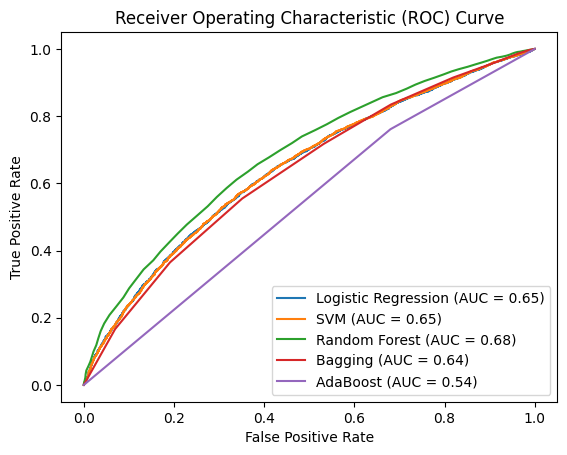

In [171]:

# Computing predicted probabilities or confidence scores for each classifier
logreg_prob = logreg_classifier.predict_proba(X_test)[:, 1]
svm_scores = svm_model.decision_function(X_test)
rf_prob = rf_classifier.predict_proba(X_test)[:, 1]
bagging_prob = bagging_classifier.predict_proba(X_test)[:, 1]
adaboost_prob = adaboost_classifier.predict_proba(X_test)[:, 1]

# Computing FPR and TPR for each classifier
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_prob)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_scores)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_prob)
bagging_fpr, bagging_tpr, _ = roc_curve(y_test, bagging_prob)
adaboost_fpr, adaboost_tpr, _ = roc_curve(y_test, adaboost_prob)

# Compute AUC for each classifier
logreg_auc = auc(logreg_fpr, logreg_tpr)
svm_auc = auc(svm_fpr, svm_tpr)
rf_auc = auc(rf_fpr, rf_tpr)
bagging_auc = auc(bagging_fpr, bagging_tpr)
adaboost_auc = auc(adaboost_fpr, adaboost_tpr)

# Plot ROC curves
plt.plot(logreg_fpr, logreg_tpr, label='Logistic Regression (AUC = {:.2f})'.format(logreg_auc))
plt.plot(svm_fpr, svm_tpr, label='SVM (AUC = {:.2f})'.format(svm_auc))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(rf_auc))
plt.plot(bagging_fpr, bagging_tpr, label='Bagging (AUC = {:.2f})'.format(bagging_auc))
plt.plot(adaboost_fpr, adaboost_tpr, label='AdaBoost (AUC = {:.2f})'.format(adaboost_auc))

# Set labels and title for the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

# Show the plot
plt.show()


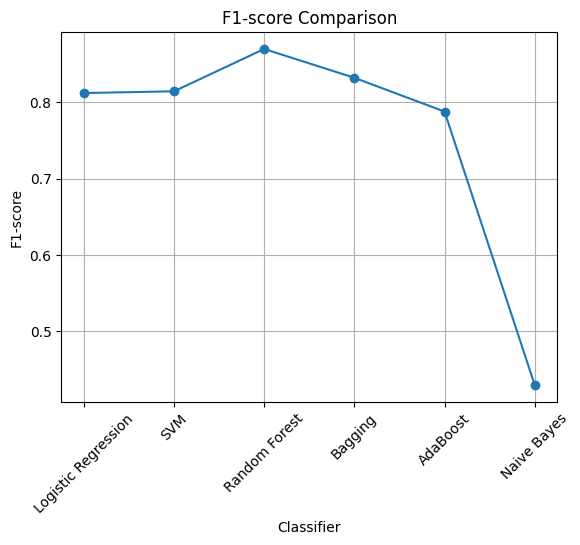

In [172]:
# Plot F1 scores
plt.plot(['Logistic Regression', 'SVM', 'Random Forest', 'Bagging', 'AdaBoost', 'Naive Bayes'], 
         [logreg_f1, svm_f1, rf_f1, bagging_f1, adaboost_f1, nb_f1], marker='o')

# Set labels and title for the plot
plt.xlabel('Classifier')
plt.ylabel('F1-score')
plt.title('F1-score Comparison')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Show the plot
plt.show()


# Performing stratified cross-validation , GridSearchCV and hyperparameter tuning on the RandomForestClassifier

In [173]:
# paramter grid is intensionally kept crisp as to keep the computational cost as low as possible 
# futher more parameters can be added to gain better performance from the model if possible.


# Define the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50,100],  
    'max_depth': [None, 10], 
    'min_samples_split': [2]  
}

# Define the stratified cross-validation strategy
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create the GridSearchCV object with scoring set to 'f1'
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=stratified_cv, scoring='f1')

# Perform hyperparameter tuning and cross-validation
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best model from the grid search
best_rf_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
rf_pred = best_rf_model.predict(X_test)

# Compute evaluation metrics for the best Random Forest model
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_cm = confusion_matrix(y_test, rf_pred)

print("Random Forest Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-score:", rf_f1)
print("Confusion Matrix:")
print(rf_cm)

# Print the best hyperparameters found during grid search
print("Best Hyperparameters:", grid_search.best_params_)


Random Forest Metrics:
Accuracy: 0.779125
Precision: 0.8217539467278671
Recall: 0.9240635019942128
F1-score: 0.869910918059339
Confusion Matrix:
[[  650  2563]
 [  971 11816]]
Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


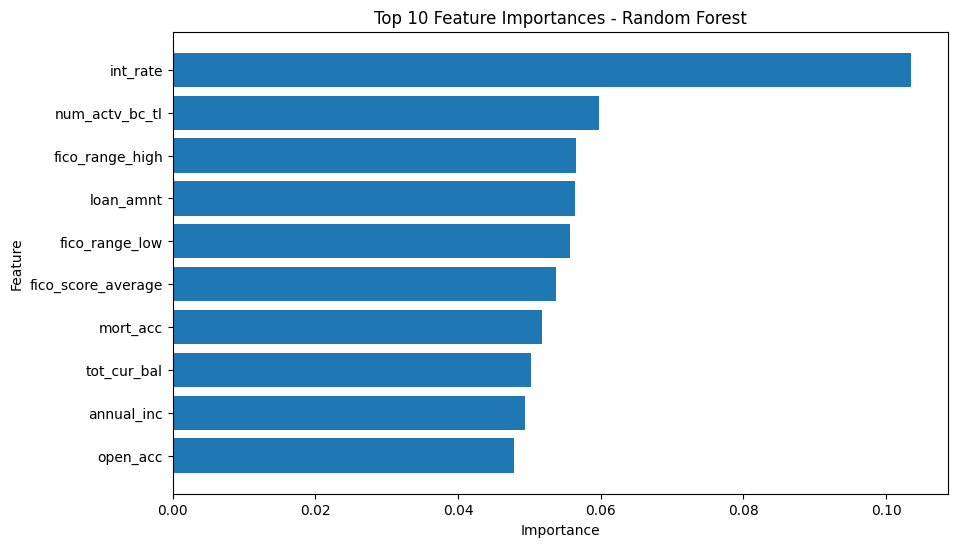

In [174]:
# Extract feature importances from the best Random Forest model
feature_importances_rf = best_rf_model.feature_importances_

# Sort feature importances in descending order
sorted_indices_rf = np.argsort(feature_importances_rf)[::-1]
sorted_importances_rf = feature_importances_rf[sorted_indices_rf]

# Get the names of the top N important features (change N as needed)
top_n_rf = 10
top_feature_names_rf = X_train_resampled.columns[sorted_indices_rf][:top_n_rf]

# Plot feature importances for Random Forest
plt.figure(figsize=(10, 6))
plt.barh(top_feature_names_rf, sorted_importances_rf[:top_n_rf])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top {} Feature Importances - Random Forest'.format(top_n_rf))
plt.gca().invert_yaxis()  # Invert y-axis to show most important features at the top
plt.show()


In [175]:

# XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

# parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50,100],  # Example values for n_estimators
    'max_depth': [2,5,10],  # Example values for max_depth
    'learning_rate': [0.1, 0.01, 0.001]  # Example values for learning_rate
}

# Define the stratified cross-validation strategy
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create the GridSearchCV object with scoring set to 'f1'
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=stratified_cv, scoring='f1')

# Perform hyperparameter tuning and cross-validation
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best model from the grid search
best_xgb_model = grid_search.best_estimator_

# Perform model validation using cross-validation
cv_scores = cross_val_score(best_xgb_model, X_train_resampled, y_train_resampled, cv=5, scoring='f1')
# Make predictions on the test data using the best model

xgb_pred = best_xgb_model.predict(X_test)

# Compute evaluation metrics for the best XGBoost model
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred)
xgb_recall = recall_score(y_test, xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)
xgb_cm = confusion_matrix(y_test, xgb_pred)


# Display cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean F1 Score:", np.mean(cv_scores))
print("XGBoost Metrics:")
print("Accuracy:", xgb_accuracy)
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1-score:", xgb_f1)
print("Confusion Matrix:")
print(xgb_cm)

# Print the best hyperparameters found during grid search
print("Best Hyperparameters:", grid_search.best_params_)


Cross-Validation Scores: [0.66795519 0.88481298 0.96352858 0.95962451 0.96471298]
Mean F1 Score: 0.8881268471240563
XGBoost Metrics:
Accuracy: 0.7908125
Precision: 0.8133713982206878
Recall: 0.9580824274653945
F1-score: 0.8798161513878416
Confusion Matrix:
[[  402  2811]
 [  536 12251]]
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}


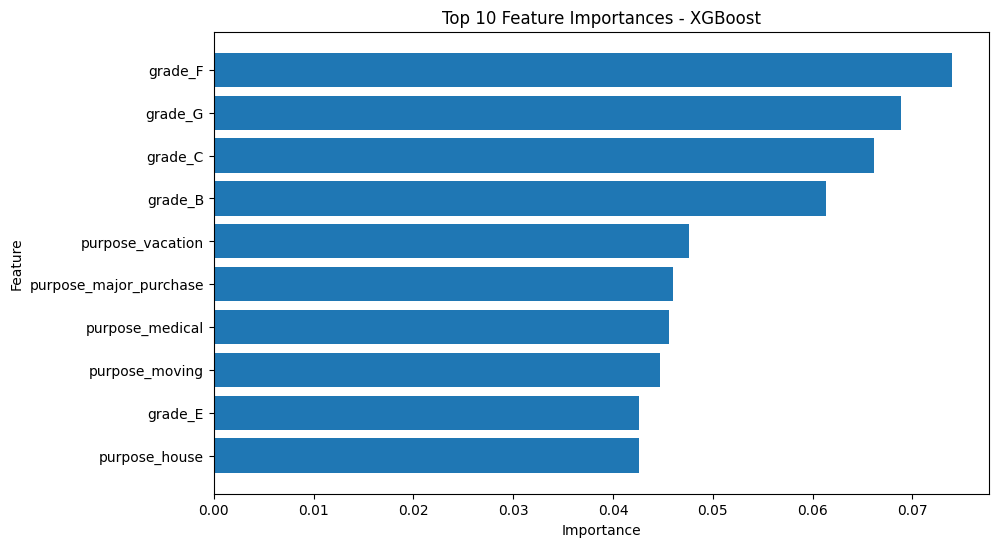

In [176]:
# Extract feature importances from the best XGBoost model
feature_importances_xgb = best_xgb_model.feature_importances_

# Sort feature importances in descending order
sorted_indices_xgb = np.argsort(feature_importances_xgb)[::-1]
sorted_importances_xgb = feature_importances_xgb[sorted_indices_xgb]

# Get the names of the top N important features (change N as needed)
top_n_xgb = 10
top_feature_names_xgb = X_train_resampled.columns[sorted_indices_xgb][:top_n_xgb]

# Plot feature importances for XGBoost
plt.figure(figsize=(10, 6))
plt.barh(top_feature_names_xgb, sorted_importances_xgb[:top_n_xgb])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top {} Feature Importances - XGBoost'.format(top_n_xgb))
plt.gca().invert_yaxis()  # Invert y-axis to show most important features at the top
plt.show()
